In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [6]:
import group_data as gd
#file_name = 'nnls_fits_no_bk_dF_F_sig_mtrx.cpkl',
#flylist = [gd.GMR22H05_pr_swarm.flies+gd.GMR22H05_prc_swarm.flies+ gd.GMR22H05_swarm.flies][0]
#flylist = gd.get_update_list(swarms = [gd.GMR22H05_pr_swarm,gd.GMR22H05_prc_swarm, gd.GMR22H05_swarm],
#                             file_name = 'nnls_fits_bk_sub_F_sig_mtrx.cpkl',
#                             replace = True)
flylist = gd.swarms['GMR40D04_ca'].flies + gd.swarms['GMR40D04_ca_mod1'].flies

In [9]:
trial_list = \
[ u'step_ptch_roll_000',
 u'step_ptch_roll_180',
 u'step_ptch_roll_090',
 u'step_ptch_roll_270',
 u'step_yaw_270',
 u'step_yaw_90',
 u'step_trans_for',
 u'step_trans_back',
 u'step_trans_left',
 u'step_trans_right',
 u'step_trans_up',
 u'step_trans_down',
]

In [10]:
trial_to_label = {
    'step_ptch_roll_000':'PU',
    'step_ptch_roll_090':'RR',
    'step_ptch_roll_180':'PD',
    'step_ptch_roll_270':'RL',
    'step_trans_for':'TB',
    'step_trans_back':'TF',
    'step_trans_left':'TR',
    'step_trans_right':'TL',
    'step_trans_up':'TD',
    'step_trans_down':'TU',
    'step_yaw_270':'YR',
    'step_yaw_90':'YL'}

In [13]:
flylist = [fly for fly in flylist if not(fly.fly_num == 631)]

In [14]:
data_dict = dict()

signal_dict = dict()
[signal_dict.update({tname:list()}) for tname in trial_list]
sig_name = 'Ph1'

for fly in flylist[1:]:
    print fly.fly_num
    fly.open_fly_record()
    import os
    os.listdir(fly.fly_path)
    data = fly.get_pkl_data('nnls_fits_bk_sub_F_sig_mtrx.cpkl')

    for i,trial_type in enumerate(trial_list):
        #sca(axlist[i])
        selection = data['trial_cond'] == trial_type
        flight_mask = np.nansum(data['wb_frequency']>150,axis = 1)>800
        selection *= flight_mask
        signals = data[sig_name][selection]
        bsline = np.nanmean(signals[:,100:300])
        if np.isnan(bsline):
            bsline = 0
        #print bsline
        signal = np.nanmean(signals,axis = 0)-bsline
        signal_dict[trial_type].append(signal)
data_dict['wing_amp'] = signal_dict


signal_dict = dict()
[signal_dict.update({tname:list()}) for tname in trial_list]
sig_name = 'hg4'

for fly in flylist[1:]:
    print fly.fly_num
    fly.open_fly_record()
    import os
    os.listdir(fly.fly_path)
    data = fly.get_pkl_data('nnls_fits_bk_sub_F_sig_mtrx.cpkl')

    for i,trial_type in enumerate(trial_list):
        #sca(axlist[i])
        selection = data['trial_cond'] == trial_type
        flight_mask = np.nansum(data['wb_frequency']>150,axis = 1)>800
        selection *= flight_mask
        signals = data[sig_name][selection]
        bsline = np.nanmean(signals[:,100:300])
        if np.isnan(bsline):
            bsline = 0
        #print bsline
        signal = np.nanmean(signals,axis = 0)-bsline
        signal_dict[trial_type].append(signal)
data_dict['hg4'] = signal_dict

617
618
619
620
621
622
624
625
626
627
632
633
634
635
617

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in greater



618
619
620
621
622
624
625
626
627
632
633
634
635


In [15]:
from matplotlib import gridspec
gs = gridspec.GridSpec(len(trial_list),2)

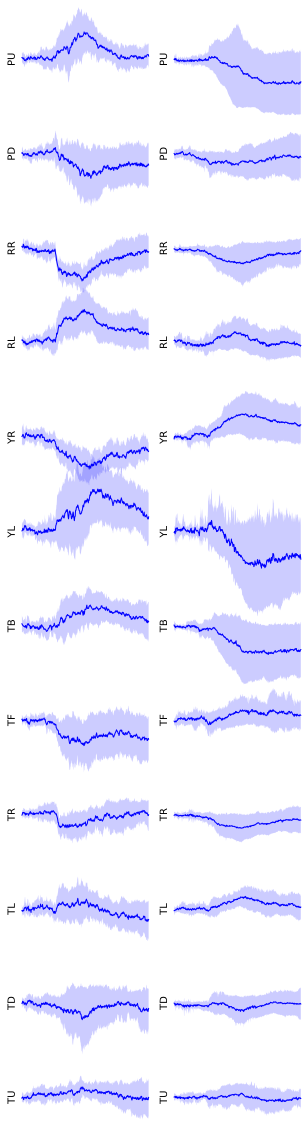

In [34]:
fig = figure(figsize = (5,20))
xi = np.linspace(0,23,1150)
sel = (xi>4) & (xi<16)
axlist_amp = [fig.add_subplot(gs[i,0]) for i,trial_type in enumerate(trial_list)]
axlist_hg4 = [fig.add_subplot(gs[i,1]) for i,trial_type in enumerate(trial_list)]

for i,trial_type in enumerate(trial_list):
    sca(axlist_amp[i])
    n= np.shape(data_dict['wing_amp'][trial_type])[0]
    md = np.nanmean(data_dict['wing_amp'][trial_type],axis = 0)
    ub = md + (np.nanstd(data_dict['wing_amp'][trial_type],axis = 0))#/np.sqrt(n))
    lb = md - (np.nanstd(data_dict['wing_amp'][trial_type],axis = 0))#/np.sqrt(n))
    
    #md = np.nanpercentile(data_dict['wing_amp'][trial_type],50,axis = 0)
    #ub = np.nanpercentile(data_dict['wing_amp'][trial_type],75,axis = 0)
    #lb = np.nanpercentile(data_dict['wing_amp'][trial_type],25,axis = 0)
    fill_between(xi[sel],ub[sel],lb[sel],alpha = 0.2,lw = 0,clip_on = False)
    plot(xi[sel],md[sel],clip_on = False)
    gca().set_ybound(-1,1)
    #gca().set_ybound(150,250)
    gca().set_ylabel(trial_to_label[trial_type])
    #gca().set_xbound(4,16)
    gca().set_xbound(4,16)
    kill_spines()
    
for i,trial_type in enumerate(trial_list):
    sca(axlist_hg4[i])
    n= np.shape(data_dict['hg4'][trial_type])[0]
    md = np.nanmean(data_dict['hg4'][trial_type],axis = 0)
    ub = md + (np.nanstd(data_dict['hg4'][trial_type],axis = 0))#/np.sqrt(n))
    lb = md - (np.nanstd(data_dict['hg4'][trial_type],axis = 0))#/np.sqrt(n))
    
    #md = np.nanpercentile(data_dict['hg4'][trial_type],50,axis = 0)
    #ub = np.nanpercentile(data_dict['hg4'][trial_type],75,axis = 0)
    #lb = np.nanpercentile(data_dict['hg4'][trial_type],25,axis = 0)
    fill_between(xi[sel],ub[sel],lb[sel],alpha = 0.2,lw = 0,clip_on = False)
    plot(xi[sel],md[sel],clip_on = False)
    gca().set_ybound(-0.4,0.4)
    gca().set_ylabel(trial_to_label[trial_type])
    gca().set_xbound(4,16)
    kill_spines()

In [17]:
def kill_spines():
    gca().spines['left'].set_visible(False)
    gca().spines['top'].set_visible(False)
    gca().spines['right'].set_visible(False)
    gca().spines['bottom'].set_visible(False)
    [x.set_visible(False) for x in plb.gca().get_xticklabels()]
    [y.set_visible(False) for y in plb.gca().get_yticklabels()]
    [x.set_visible(False) for x in plb.gca().get_xticklines()]
    [y.set_visible(False) for y in plb.gca().get_yticklines()]

In [11]:
import h5py
epoch_db = h5py.File('../imaging_post_processing/epoch_db.hdf5','a')

8

In [ ]:
data = dict()
data['exp_names'] = np.array(epoch_db['exp_names'])
data['fly_numbers'] = np.array(epoch_db['fly_numbers'])
data['genotypes'] = np.array(epoch_db['genotypes'])
data['signal_data'] = np.array(epoch_db['signal_data'])
data['signal_names'] = np.array(epoch_db['signal_names'])
data['trial_names'] = np.array(epoch_db['trial_names'])

In [ ]:
def fly_medians(data,mask):
    xi = np.linspace(0,23,1150)
    baseline_epoch = (xi >5) & (xi < 7)
    ave_dict = dict()
    signal_set = set(data['signal_names'][mask])
    trial_set = set(data['trial_names'][mask])
    fly_set = set(data['fly_numbers'][mask])
    for signal in signal_set:
        ave_dict[signal] = dict()
        for trial in trial_set:
            ave_dict[signal][trial] = list()
            for fly in fly_set:
                selection = (data['fly_numbers'] == fly) & \
                            (data['signal_names'] == signal) & \
                            (data['trial_names'] == trial) & \
                            mask
                datamtrx = data['signal_data'][selection,:] 
                baseline = np.mean(data['signal_data'][selection][:,baseline_epoch],axis = 1)
                datamtrx -= baseline[:,np.newaxis]
                ave_dict[signal][trial].append(np.nanmedian(datamtrx,axis = 0)) 
    return ave_dict

In [ ]:
mask = (data['exp_names'] == 'GMR40D04_ca')